## 6.8 NDVI

归一化植被指数(NDVI)是一个用来分析植被变化的指数。NDVI计算表达式为:

<center>$NDVI =\frac{NIR-RED}{NIR+RED}\qquad \qquad \qquad (6.3)$</center>

我们从导入库开始，不要忘记从`__future__`库中导入`division`函数。这是为了避免整数除法。然后我们读取tiff格式的数据。要计算NDVI，我们需要NIR(band4)和RED(band3)的数据。

In [1]:
# import the required library
from __future__ import division
from osgeo import gdal
from osgeo.gdalconst import *
import matplotlib.pyplot as plt

# read the banda 3 raster data
driver = gdal.GetDriverByName('GTiff')
file_name = "datas/band3.tif"
dataset = gdal.Open(file_name, GA_ReadOnly)
geotransform = dataset.GetGeoTransform()
projection = dataset.GetProjection()
band3 = dataset.GetRasterBand(1).ReadAsArray()
dataset = None
# read the band 4 raster data
file_name = "datas/band4.tif"
dataset = gdal.Open(file_name, GA_ReadOnly)
band4 = dataset.GetRasterBand(1).ReadAsArray()
dataset = None

除了数据外，我们也检索`geotransform`和`projection`信息。让我们逐一打印它们。

In [2]:
print(geotransform)

(76.5, 0.001, 0.0, 11.85, 0.0, -0.001)


第一个条目告诉我们，西北角的经度和维度分别为11.85和76.5。数据的分别率在x和y方向均为0.001，并且影像没有旋转。现在，让我们打印投影信息。

In [3]:
print(projection)

GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]]


这告诉我们，数据资料为WGS84，我们的数据是在地理坐标中(经度和纬度)。更多关于投影和他们的参数的细节可以在`http://spatialreference.org`找到。

我们可以使用`dtype`属性检查数据类型。我们看到了数据类型为整型。这就是为什么我们从`__future__`库中导入`division`，来避免整数除法。

In [4]:
print(band3.dtype)

uint8


现在我们计算NDVI，并使用`matshow`绘制结果。在`matshow`中，我们也指定了`vmin`和`vmax`来控制`colorbar`的程度。

C:\Users\laihetao\AppData\Local\conda\conda\envs\DataProcess\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\laihetao\AppData\Local\conda\conda\envs\DataProcess\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


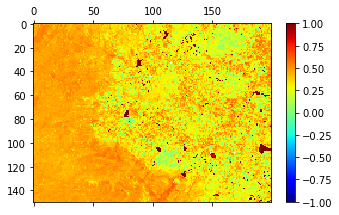

In [5]:
ndvi = (band4-band3)/(band4+band3)

plt.matshow(ndvi,cmap=plt.cm.jet, vmin=-1, vmax=1)
plt.colorbar(shrink=0.8)
plt.show()

<center>图6.8：归一化地形指数</center>